## LAB No. 5

## <center> A* Algorithm </center>

### Task 1: 
### Implement A* Search using Railroad network scenario.

Shortest path from A to E: ['A', 'C', 'D', 'E']


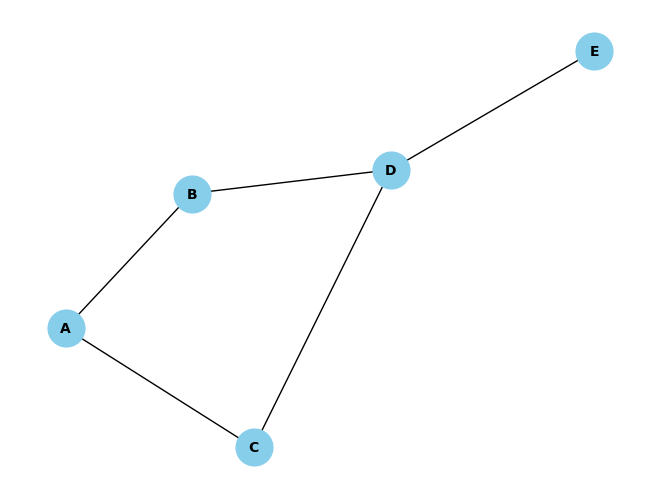

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a simple railroad network graph
railroad_network = nx.Graph()

# Add nodes and edges with weights representing distances
railroad_network.add_edge("A", "B", weight=4)
railroad_network.add_edge("A", "C", weight=2)
railroad_network.add_edge("B", "D", weight=5)
railroad_network.add_edge("C", "D", weight=1)
railroad_network.add_edge("D", "E", weight=3)

# Function to implement A* search
def astar_search(graph, start, goal):
    # Heuristic function (in this case, straight-line distance)
    def heuristic(node, goal):
        coordinates = {"A": (0, 0), "B": (1, 0), "C": (0, 1), "D": (1, 1), "E": (2, 1)}
        x1, y1 = coordinates[node]
        x2, y2 = coordinates[goal]
        return abs(x1 - x2) + abs(y1 - y2)

    # Priority queue for open nodes
    open_nodes = [(0 + heuristic(start, goal), 0, start, [])]

    while open_nodes:
        _, cost, current_node, path = open_nodes.pop(0)

        if current_node == goal:
            return path + [current_node]

        for neighbor in graph.neighbors(current_node):
            if neighbor not in path:
                new_cost = cost + graph[current_node][neighbor]["weight"]
                new_heuristic = new_cost + heuristic(neighbor, goal)
                new_path = path + [current_node]

                # Add the neighbor to the open nodes with its cost and heuristic
                open_nodes.append((new_heuristic, new_cost, neighbor, new_path))

                # Sort the open nodes based on the total estimated cost
                open_nodes.sort()

    return None  # No path found

# Find a path from "A" to "E" using A* search
start_node = "A"
goal_node = "E"
path_result = astar_search(railroad_network, start_node, goal_node)

# Print the result
if path_result:
    print(f"Shortest path from {start_node} to {goal_node}: {path_result}")
else:
    print(f"No path found from {start_node} to {goal_node}")

# Draw the graph
pos = nx.spring_layout(railroad_network)
nx.draw(railroad_network, pos, with_labels=True, font_weight='bold', node_size=700, node_color="skyblue", font_size=10)
plt.show()


This code defines a simple railroad network graph using the networkx library and then implements the A* search algorithm to find the shortest path between two nodes (stations in this case) in the network. The heuristic function used is a straight-line distance between nodes based on their coordinates. Finally, the result is printed, and the graph is visualized using Matplotlib.